Stating the problem:

- Given a set of points: ${(x_1, y_1), (x_2, y_2), ... (x_n, y_n)}$
- Plot them in a 2D chart
- Find the line of best fit

Our line of best fit:  
$\hat{y_i} = ax_i + b$

We would like $\hat{y_i}$ as close to $y_i, i = 1 .. n$ as possible.

The error:  
$\sum_{i=1}^{N}(y_i - \hat{y_i})^2$

Substitute with our expression for the line:  
$\sum_{i=1}^{N}(y_i - (ax_i + b))^2$

$y_i$ and $x_i$ are given, what we want to find is $a$ and $b$.

Since we want to minimize w.r.t. two things at the same time, we need to use partial derivatives, and set it to zero.

$\frac{\partial E}{\partial a} = \sum_{i=1}^{N} 2(y_i - (ax_i + b))(-x_i) = 0$  
$\frac{\partial E}{\partial b} = \sum_{i=1}^{N} 2(y_i - (ax_i + b))(-1) = 0$

$a\sum_{i=1}^{N}x_i^2 + b\sum_{i=1}^{N}x_i = \sum_{i=1}^{N}y_ix_i$  
$a\sum_{i=1}^{N}x_i + b\sum_{i=1}^{N}1 = \sum_{i=1}^{N}y_i$  

Equivalent to  
$aC + bD = E$  
$aD + bN = F$

$a = \frac{EN - FD}{CN - D^2}$  
$b = \frac{ED - FC}{D^2 - NC}$  

After simplification (substituting original values, dividing Nr and Dr by N, using definition of sample mean...)  
$a = \frac{\sum{y_i x_i} - \bar{y} \sum{x_i}}{\sum{x^2}-\bar{x}\sum{x_i}}, 
b = \frac{\bar{y}\sum{x_i^2} - \bar{x}\sum{x_i y_i}}{\sum{x^2}-\bar{x}\sum{x_i}}$

In [ ]:
# In numpy, np.dot(x,y) is equivalent to \sum_{i=1}{n} x_i y_i
# Try to never use for loops in numpy

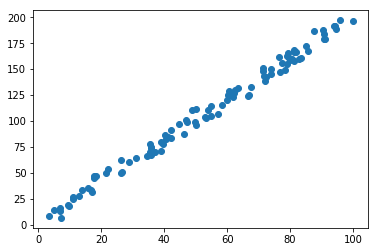

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = []
Y = []

for line in open('../machine_learning_examples/linear_regression_class/data_1d.csv'):
    x, y = line.split(',')
    X.append(float(x))
    Y.append(float(y))
    
X, Y = np.array(X), np.array(Y)

plt.scatter(X,Y)

In [14]:
denominator = X.dot(X) - X.mean()*X.sum()
a = (Y.dot(X) - Y.mean()*X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean()*Y.dot(X)) / denominator

In [15]:
Y_hat = a*X + b

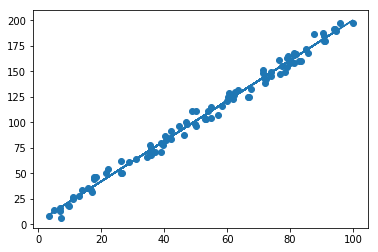

In [17]:
plt.scatter(X,Y)
plt.plot(X,Y_hat)

How do we determine the effectiveness of our model? A numerical model for how good our model is.

What we generally use for regression, not just linear regression:
$R^2$ or $r^2$ : R squared.

$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$  

$SS_{res} = \sum{(y_i - \hat{y}_i)^2}$  
$SS_{tot} = \sum{(y_i - \bar{y})^2}$  

Note that $R^2$ of 1 is the best case fit, and the worst case fit is $R^2 = 0$. When does $R^2 = 0$ happen? When $SS_{tot} = SS_{res}$. Which means we basically predicated just the average of $y$.

You can even do worse than worse! If you get a negative $R^2$ ($SS_{res} < SS_{tot}$), you are doing worse than predicting the mean.

In [18]:
SSres = (Y - Y_hat).dot(Y - Y_hat)
SStot = (Y - Y.mean()).dot(Y - Y.mean())
# Cool numpy property. Subtracts scalar from each element of vector

In [19]:
R2 = 1 - SSres / SStot

In [20]:
R2

0.99118382029778052